In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset_path = "C:\\Users\\Admin\\Desktop\\DA_data\\rta_data.csv"
data = pd.read_csv(dataset_path)


In [ ]:
# Summarize the dataset: target variable, missing values, and basic statistics
target_variable = "Accident_severity"

# Summary of the target variable
target_summary = data[target_variable].value_counts()

# Checking for missing values
missing_values = data.isnull().sum()

# Data types and summary statistics for numeric columns
numeric_summary = data.describe(include=[float, int])

# Data types and summary statistics for categorical columns
categorical_summary = data.describe(include=[object])

# Output the summaries
target_summary, missing_values, numeric_summary, categorical_summary

(Accident_severity
 Slight Injury     10415
 Serious Injury     1743
 Fatal injury        158
 Name: count, dtype: int64,
 Time                              0
 Day_of_week                       0
 Age_band_of_driver                0
 Sex_of_driver                     0
 Educational_level               741
 Vehicle_driver_relation         579
 Driving_experience              829
 Type_of_vehicle                 950
 Owner_of_vehicle                482
 Service_year_of_vehicle        3928
 Defect_of_vehicle              4427
 Area_accident_occured           239
 Lanes_or_Medians                385
 Road_allignment                 142
 Types_of_Junction               887
 Road_surface_type               172
 Road_surface_conditions           0
 Light_conditions                  0
 Weather_conditions                0
 Type_of_collision               155
 Number_of_vehicles_involved       0
 Number_of_casualties              0
 Vehicle_movement                308
 Casualty_class            

In [ ]:
print("Dataset Info:\n")
data.info()
print("\nFirst 5 Rows:\n")
print(data.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment 

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
missing_categorical_cols = ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality']
data[missing_categorical_cols] = data[missing_categorical_cols].fillna('Unknown')

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
var_thresholder = VarianceThreshold(threshold=0.01)
X_low_var = var_thresholder.fit_transform(data.drop(columns=["Accident_severity"]))
low_variance_columns = data.drop(columns=["Accident_severity"]).columns[~var_thresholder.get_support()]
print("\nLow-Variance Columns Removed:\n", low_variance_columns)
data = data.drop(columns=low_variance_columns)


Low-Variance Columns Removed:
 Index([], dtype='object')


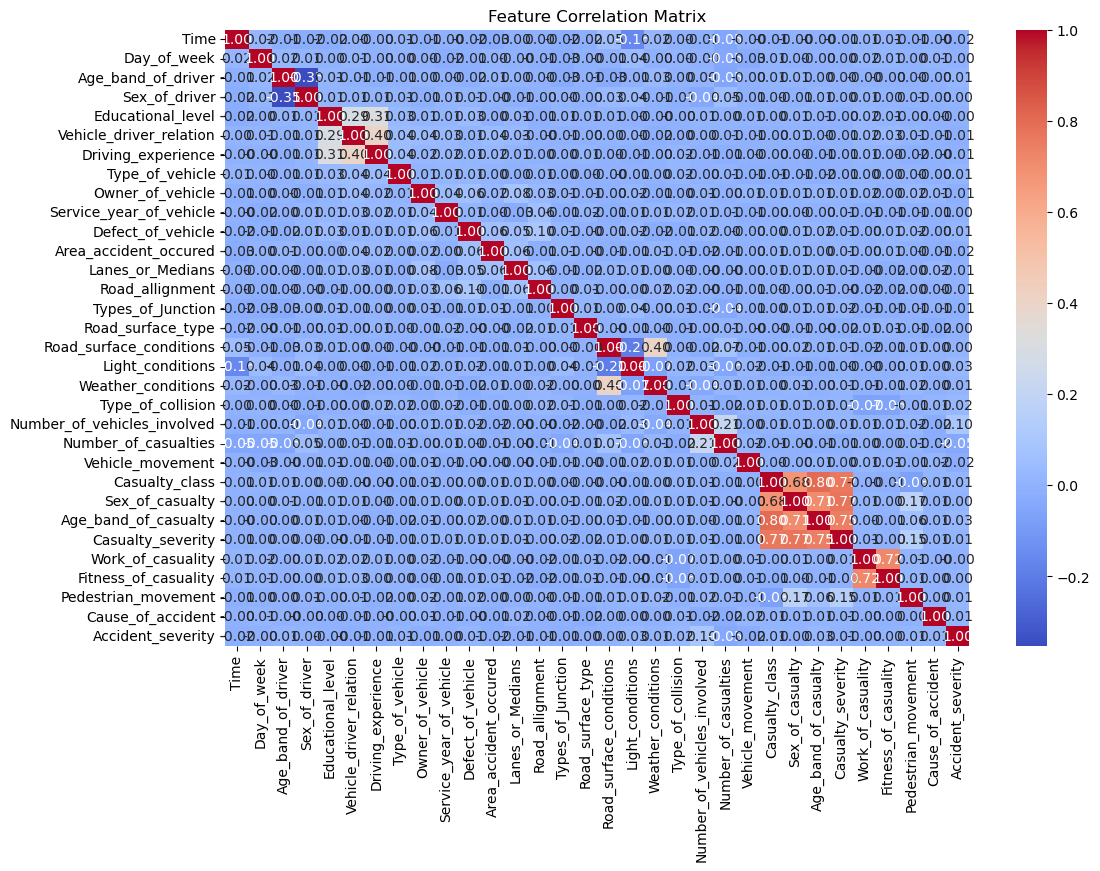

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.9]
high_corr_features = set(pair[1] for pair in high_corr_pairs)
print("\nHighly Correlated Features Removed:\n", high_corr_features)
data = data.drop(columns=high_corr_features)


Highly Correlated Features Removed:
 set()


In [ ]:
target_column = "Accident_severity"
X = data.drop(columns=[target_column])
y = data[target_column]

In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("\nTrain-Test Split:\n")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Train-Test Split:

X_train: (24996, 31), X_test: (6249, 31)
y_train: (24996,), y_test: (6249,)


In [ ]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}